<h1 style="text-align: center; color: navy; font-family: 'Arial Black', Gadget, sans-serif;">
    Análisis Predictivo del Éxito en Ventas de Videojuegos: Un Estudio Basado en Reseñas, Plataformas y Géneros en la Tienda Online Ice
</h1>

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Descripción de los datos](#data_review)
    * [Conclusiones](#data_review_conclusions)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
    * [2.1 Normalización de los datos](#normalization)
    * [2.2 Valores Duplicados](#duplicates)
    * [2.3 Valores ausentes](#missing_values)
    * [2.4 Tipos de datos](#data_type)
    * [2.5 Conclusiones](#data_preprocessing_conclusions)
* [Etapa 3. Análisis de los datos](#data_analyst)
    * [3.1 Año de lanzamiento del juego](#year_release)
    * [3.2 Variaciones de ventas de videojuego por plataforma](#sales_per_platform)
    * [3.2 Determinación del tiempo de lanzamiento para estimar la campaña de 2017](#sales_2017)
    * [3.3 Plataformas líderes en ventas de 2011 - 2016](#leaders_platforms)
    * [3.4 Creación de diagrama de caja para las ventas globales de los juegos](#boxplot_total_sales)
    * [3.5 Correlación de `total_sales` y `user_score` en la plataforma `x360`](#correlation_x360)
    * [3.6 Comparar las ventas de videojuegos x360 con otras plataformas](#x360_vs_others)
    * [3.7 Distribución general de los géneros más famosos y menos rentables](#genres_famous)
    * [3.8 Creación de perfil de usuario para cada región para obtener las 5 plataformas mas exitosas y los 5 géneros mas demandados](#user_perfil)
    * [3.5 Conclusiones](#data_analyst_conclusions)
* [Etapa 4. Prueba de Hipótesis](#data_hypotesis)  
* [Conclusiones finales del proyecto](#final_conclusions)

## Introducción <a id =intro></a>

En la industria de los videojuegos, la competencia es feroz y la clave del éxito radica en comprender los factores que influyen en las ventas de los juegos. Con la creciente disponibilidad de datos sobre reseñas de usuarios y expertos, plataformas de distribución, géneros y ventas históricas, las empresas tienen la oportunidad de utilizar el análisis de datos para predecir el éxito de futuros lanzamientos y planificar de manera más efectiva sus campañas publicitarias.

Este proyecto se centra en la tienda online Ice, una plataforma global de ventas de videojuegos, donde se analizarán datos que abarcan desde 2016. El objetivo principal es identificar patrones en las ventas de videojuegos que puedan predecir si un juego será exitoso o no. A través del análisis de reseñas, plataformas y géneros, se buscará desarrollar un perfil detallado de los juegos más prometedores para el año 2017, permitiendo a la empresa tomar decisiones informadas sobre la asignación de recursos y estrategias de marketing.

En este estudio, se abordarán aspectos clave como la limpieza y preparación de datos, el análisis de tendencias en ventas por plataforma, la evaluación de la influencia de las reseñas en las ventas, y la creación de perfiles de usuarios para diferentes regiones del mundo. Además, se probarán hipótesis específicas para profundizar en la comprensión de las preferencias de los consumidores en diferentes plataformas y géneros.

El resultado de este análisis no solo proporcionará a Ice una base sólida para la planificación de sus campañas publicitarias, sino que también servirá como una guía práctica para la aplicación de técnicas de ciencia de datos en la toma de decisiones estratégicas en la industria de los videojuegos.

# Etapa 1: Descripción de los Datos <a id=data_review></a>

In [1]:
# Importación de las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
# Importar el DF

df_games = pd.read_csv('/home/josue/Modulo_uno_proyecto_final/games.csv')

# Revisar el df
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Revisar cuántas filas duplicadas tenemos y cuántos valores ausentes hay
#df_games = df_games['user'].duplicated()

filas_duplicadas = df_games.duplicated().sum()
print(f"El número de filas duplicadas del df es: {filas_duplicadas}")
print()

for col in df_games.columns:
    ausentes = df_games[col].isna().sum()
    print(f"La columna {col} tiene {ausentes} valores ausentes")

El número de filas duplicadas del df es: 0

La columna Name tiene 2 valores ausentes
La columna Platform tiene 0 valores ausentes
La columna Year_of_Release tiene 269 valores ausentes
La columna Genre tiene 2 valores ausentes
La columna NA_sales tiene 0 valores ausentes
La columna EU_sales tiene 0 valores ausentes
La columna JP_sales tiene 0 valores ausentes
La columna Other_sales tiene 0 valores ausentes
La columna Critic_Score tiene 8578 valores ausentes
La columna User_Score tiene 6701 valores ausentes
La columna Rating tiene 6766 valores ausentes


## Conclusiones de descripción de los datos<a id=data_review_conclusions></a>

Se realizó una inspección preliminar de los datos contenidos en el archivo `games.csv`, la cual incluyó los siguientes pasos:

- **Revisión de la estructura del DataFrame**: Se utilizó el método `info()` para obtener una visión general de la cantidad de entradas (filas) y columnas en el DataFrame, así como del tipo de datos y la cantidad de valores no nulos en cada columna. Esto permitió identificar las columnas con valores ausentes.

- **Detección de filas duplicadas**: Se verificó la existencia de filas duplicadas utilizando el método `duplicated()`. Los resultados mostraron que no hay filas duplicadas en el DataFrame, lo que indica que cada registro en el conjunto de datos es único.

- **Identificación de valores ausentes**: Se comprobó cuántos valores ausentes hay en cada columna utilizando el método `isna().sum()`. Se identificaron varias columnas con valores ausentes, destacando particularmente `Critic_Score`, `User_Score` y `Rating`, que presentan un número significativo de valores faltantes.

### Próximos Pasos: Preprocesamiento de los Datos
En la siguiente etapa, se enfocará en el **preprocesamiento de los datos**, que incluirá:

- **Manejo de valores ausentes**: Se decidirá cómo tratar los valores ausentes en las columnas identificadas. Esto puede incluir la imputación de valores, eliminación de filas o columnas, o la aplicación de algún método específico para abordar los valores faltantes en las columnas más relevantes.

- **Conversión de tipos de datos**: Se asegurará que todas las columnas tengan el tipo de datos adecuado para el análisis. Por ejemplo, las columnas que representan puntuaciones (`User_Score` y `Critic_Score`) podrían necesitar ser convertidas de `object` a `float`.

- **Normalización de los nombres de las columnas**: Se asegurará que todos los nombres de las columnas sean consistentes, utilizando minúsculas y sin espacios innecesarios.

- **Creación de nuevas variables si es necesario**: Por ejemplo, se podría calcular las ventas totales combinando las ventas de las diferentes regiones en una nueva columna.


# Etapa 2: Preprocesamiento de los Datos <a id=data_preprocessing></a>

## 2.1 Normalización de los Datos <a id=normalization></a>

In [5]:
# Normalizar los nombres de columna
df_games.columns = df_games.columns.str.strip().str.lower()

In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
# Normalizar los elementos del DF con applymap
df_games = df_games.applymap(lambda s: s.lower() if type(s) == str else s)

C:\Users\Albert\AppData\Local\Temp\ipykernel_35180\1708236428.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_games = df_games.applymap(lambda s: s.lower() if type(s) == str else s)


In [9]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 2.2 Valores duplicados <a id=duplicates></a>

In [10]:
df_games.duplicated().sum()

0

In [11]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## 2.3 Valores ausentes <a id=missing_values></a>

### Columna `name`

In [12]:
# Obtener la moda del valor de `name` asignarla a la columna `name`
moda_global = df_games['name'].mode().iloc[0]
df_games['name'] = df_games['name'].fillna(moda_global)

### Columna `year_of_release`

In [13]:
# Obtener la moda en base a `platform`
df_games['year_of_release'] = df_games.groupby('platform')['year_of_release'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

### Columna `genre`

In [14]:
# Obtener la moda del valor de `genre` asignarla a la columna `name`
df_games['genre'] = df_games.groupby('platform')['genre'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

### Columna `critic_score`

In [15]:
# Utilizar groupby y transform para rellenar los valores ausentes en `critic_score` y los valores ausentes que queden serán rellenados con el promedio global de la columna
df_games['critic_score'] = df_games.groupby('genre')['critic_score'].transform(lambda x: x.fillna(x.mean()))
df_games['critic_score'] = df_games['critic_score'].fillna(df_games['critic_score'].mean())

### Columna `user_score`

In [16]:
# Verificar que datos contiene debido a que el df original tiene un tipo de dato Object, de no tener todas las filas numéricas tendremos un error.
print(df_games['user_score'].unique())

# Convertir las filas con el sufijo `tbd` a nan para poder tratarlos con la media de las filas restantes
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)

# Convertir a un tipo de dato numérico, se necesita utilizar to_numeric para poder asegurar que no fallará el código, ya que si hay valores ausentes, métodos como astype retornarán un error, gracias a errors='coerce' evitamos eso
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

# Extraer y rellenar con groupby y transform aplicados a `critic_score` para obtener la media y rellenar los valores ausentes
df_games['user_score'] = df_games.groupby('genre')['user_score'].transform(lambda x: x.fillna(x.mean()))

# Al ejecutar la línea anterior quedan algunos valores faltantes, así que, vamos a sustituirlos con la media global los que falten
df_games['user_score'] = df_games['user_score'].fillna(df_games['user_score'].mean())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


### Columna `rating`

In [17]:
# Observar los valores únicos que tenemos en nuestro df
valores_unicos_rating = df_games['rating'].unique()
valores_unicos_rating

# Función para encontrar la moda de `rating`
df_games['rating'] = df_games.groupby('genre')['rating'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Rellenar los valores ausentes en 'rating' con la moda global
df_games['rating'] = df_games['rating'].fillna(df_games['rating'].mode()[0])

## 2.4 Tipos de Datos <a id=data_type></a>

In [18]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2009.0,misc,41.36,28.96,3.77,8.45,76.000000,8.000000,e
1,super mario bros.,nes,1986.0,platform,29.08,3.58,6.81,0.77,68.692403,7.139397,e
2,mario kart wii,wii,2009.0,misc,15.68,12.76,3.79,3.29,82.000000,8.300000,e
3,wii sports resort,wii,2009.0,misc,15.61,10.93,3.28,2.95,80.000000,8.000000,e
4,pokemon red/pokemon blue,gb,2000.0,role-playing,11.27,8.89,10.22,1.00,68.692403,7.139397,e


In [19]:
# Después de estar seguros que no tenemos valores ausentes, pasaremos a modificar los tipos de datos, en este df solo se modificará uno que es la columna `year_of_release`
df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'], format='%Y')

# Observamos que las columnas `critic_score` y `user_score` tienen numero muy grandes asi que vamos a reducirlos para que solo queden con dos decimales mediante una función lambda
df_games['critic_score'] = df_games['critic_score'].apply(lambda x: int(x * 100) / 100)
df_games['user_score'] = df_games['user_score'].apply(lambda x: int(x * 100) / 100)

In [20]:
# Por último agregaremos las ventas totales de cada juego de las 3 regiones
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales']



## Conclusiones <a id=data_preprocessing_conclusions></a>

### **Conclusión:**

Durante el preprocesamiento de datos en pandas, se utilizaron `apply` y `transform` para manejar y transformar datos de manera eficiente.

- **Valores Ausentes:** Se rellenaron valores faltantes usando `groupby` y `transform`, aplicando la media o la moda según el contexto, asegurando que no quedaran valores `NaN`.
- **Uso de `apply` y `transform`:** `apply` se usó para operaciones personalizadas en elementos individuales, mientras que `transform` se aplicó para mantener la alineación de los resultados con los datos originales.
- **Truncado de Decimales:** Se truncaron valores numéricos a dos decimales utilizando `apply` con una función lambda, lo que permitió un control preciso del formato de los datos.
- **Formateo de Fechas:** Se convirtió una columna de años a un formato `datetime` para facilitar el análisis temporal.

Este proceso aseguró que los datos estuvieran bien preparados para análisis posteriores, utilizando las herramientas más adecuadas según cada situación.


# Etapa 3: Análisis de Datos <a id=data_analyst></a>

### Año de lanzamiento de cada juego <a id=year_release></a>

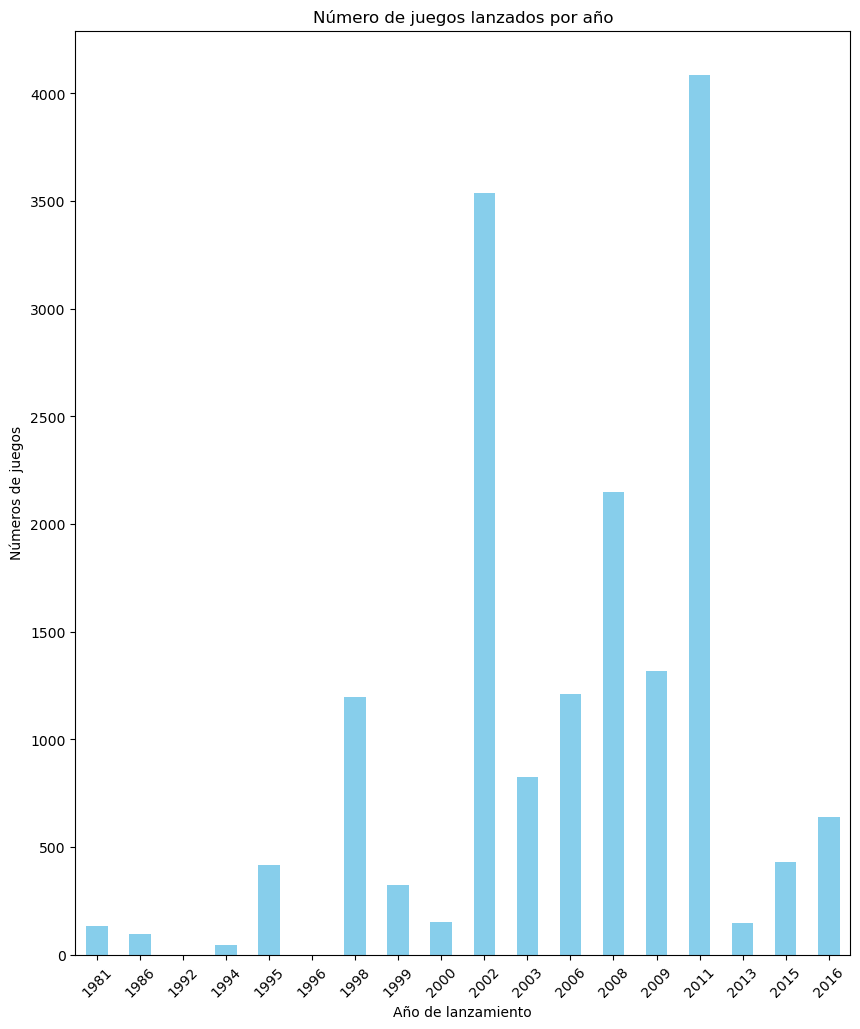

In [21]:
# Extraer sólo el año de lanzamiento
df_games['year_of_release'] = df_games['year_of_release'].dt.year

# Año de lanzamiento de cada juego
launch_year_game = df_games.groupby('year_of_release').size()

# Creación de un gráfico de barras
plt.figure(figsize=(10, 12))

# Crear el gráfico de barras
launch_year_game.plot(kind='bar', color='skyblue')

# Agregar títulos al gráfico de barras
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Números de juegos')
plt.xticks(rotation=45)

plt.show()

Después de analizar este gráfico vemos que hay muchas diferencias en los juegos lanzados, claro mucho tiene que ver la fecha de creación de cada juego, definitivamente encontramos fechas significativamente altas y bajas, sigamos con el análisis.

### Variaciones de ventas de videojuego por plataforma <a id=sales_per_platform></a>

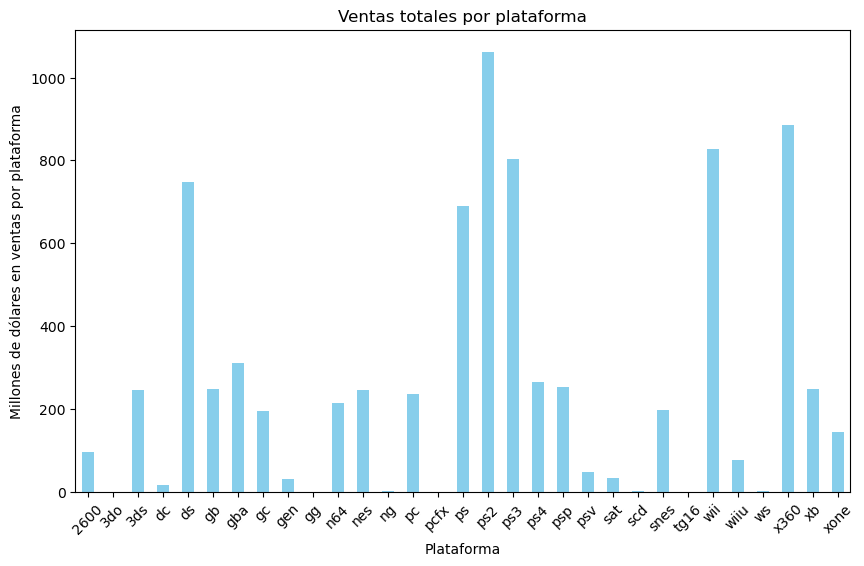

In [22]:
# Extraer ventas totales por plataforma 
total_income_platform = df_games.groupby('platform')['total_sales'].sum()

# Creación de un gráfico de barras
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
total_income_platform.plot(kind='bar', color='skyblue')

# Agregar títulos al gráfico de barras
plt.title('Ventas totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Millones de dólares en ventas por plataforma')
plt.xticks(rotation=45)

plt.show()


Podemos observar que hay plataformas con muy pocas ventas, otras con una cantidad de ventas un tanto razonable y otras con una cantidad de ventas muy buenas, para un análisis mas detallado vamos a seleccionar las plataformas con las ventas mas altas, una buena cantidad será arriba de los 400 millones USD, de esta forma estamos seleccionado las plataformas con las ventas mas altas.

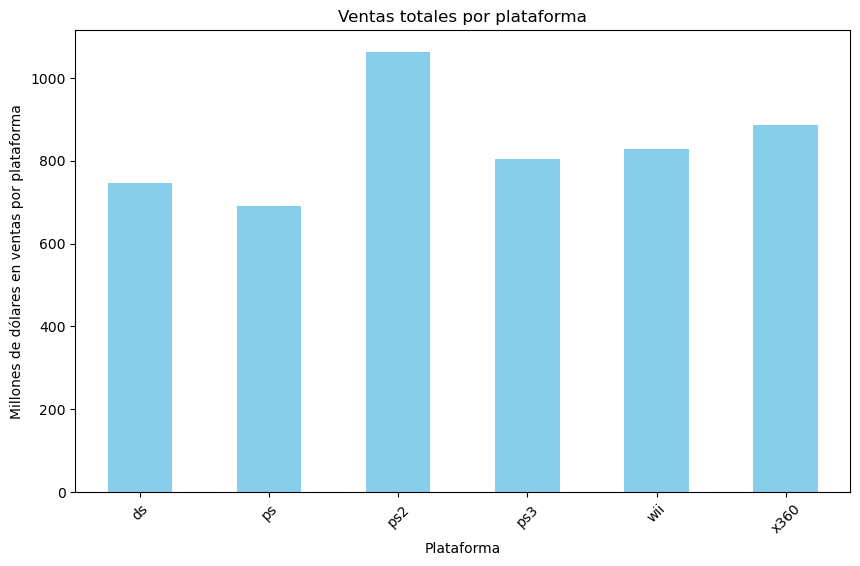

In [23]:
# Reducción de plataformas con ventas totales mas altas
total_income_platform = total_income_platform[total_income_platform > 400]

# Creación de un gráfico de barras
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
total_income_platform.plot(kind='bar', color='skyblue')

# Agregar títulos al gráfico de barras
plt.title('Ventas totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Millones de dólares en ventas por plataforma')
plt.xticks(rotation=45)

plt.show()

Con esta distribución logramos observar que tenemos 6 plataformas con ventas significativamente altas, que son `ds`, `ps`, `ps2`, `ps3`, `wii`, `x360` por encima de los 400 millones, la pregunta sería Son plataformas que han manteniendo a lo largo de los años un nivel alto de ventas? O por el contrario últimamente sus ventas han venido a la baja?

In [24]:
# Lista de plataformas que quieres filtrar
platforms = ['ds', 'ps', 'ps2', 'ps3', 'wii', 'x360']
# Si las plataformas son valores dentro de la variable 'platforms'
filtered_platform = df_games[df_games['platform'].isin(platforms)]
filtered_platform = filtered_platform.groupby(['platform', 'year_of_release'])['total_sales'].sum()
filtered_platform


platform  year_of_release
ds        2008                746.86
ps        1998                689.95
ps2       2002               1062.33
ps3       2011                803.97
wii       2009                828.44
x360      2011                885.66
Name: total_sales, dtype: float64

Podemos concluir que las plataformas tienen un auge y después ese auge tiende a bajar, por ejemplo para el siglo XX en 1998 la plataforma `ps` era la reina con 689 millones dólares vendidos, más sin embargo su éxito quedó a esos tiempos, la plataforma más exitosa de nuestros datos es `ps2` con mas de mil millones de dólares vendidos, y la mas reciente es la `x360` del año 2011 con ventas de mas de 800 millones de dólares, como vemos cada plataforma es exitosa en sus tiempos.

### Determinación del tiempo de lanzamiento para estimar la campaña de 2017 <a id=sales_2017></a>

In [25]:
# Se elegirán los datos de los años 2013 - 2016
df_games_updated = df_games[(df_games['year_of_release'] >= 2011) & (df_games['year_of_release'] <= 2016)]
df_games_updated

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,kinect adventures!,x360,2011,action,15.00,4.89,0.24,1.69,61.00,6.30,e,20.13
16,grand theft auto v,ps3,2011,action,7.02,9.09,0.98,3.96,97.00,8.19,e,17.09
23,grand theft auto v,x360,2011,action,9.66,5.14,0.06,1.41,97.00,8.10,e,14.86
29,call of duty: modern warfare 3,x360,2011,action,9.04,4.24,0.13,1.32,88.00,3.40,e,13.41
31,call of duty: black ops 3,ps4,2016,action,6.03,5.86,0.36,2.38,69.26,6.87,e,12.25
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,aiyoku no eustia,psv,2015,action,0.00,0.00,0.01,0.00,69.26,6.87,e,0.01
16710,samurai warriors: sanada maru,ps3,2011,action,0.00,0.00,0.01,0.00,69.26,6.87,e,0.01
16711,lma manager 2007,x360,2011,action,0.00,0.01,0.00,0.00,69.26,6.87,e,0.01
16712,haitaka no psychedelica,psv,2015,action,0.00,0.00,0.01,0.00,69.26,6.87,e,0.01


### Plataformas líderes en ventas de 2011 - 2016 <a id=leaders_platforms></a>

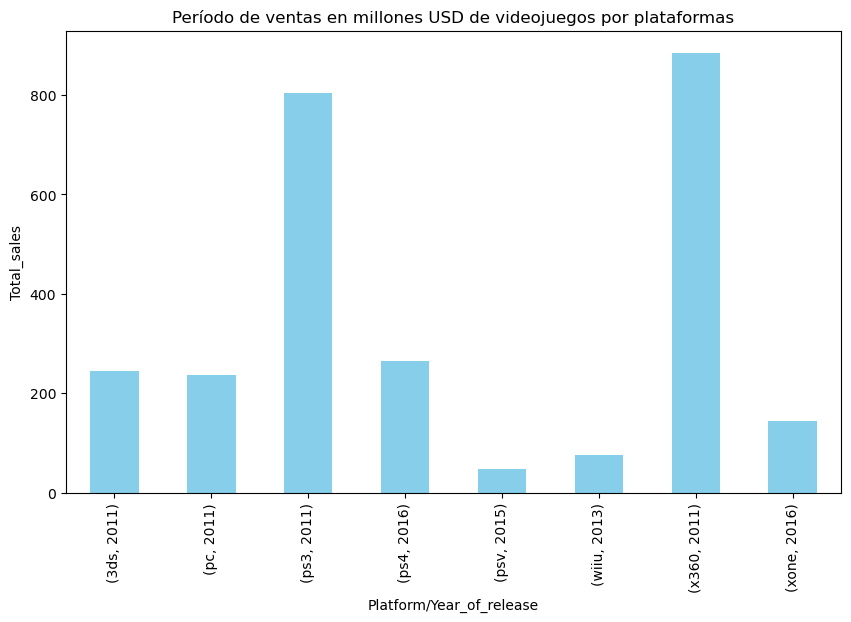

In [26]:
# Filtrado y agrupamiento por plataformas exitosas
platforms_top = df_games_updated.groupby(['platform', 'year_of_release'])['total_sales'].sum()

# Creación de un gráfico de barras
plt.figure(figsize=(10, 6))
platforms_top.plot(kind='bar', color='skyblue')

# Creación de etiquetas
plt.title('Período de ventas en millones USD de videojuegos por plataformas')
plt.xlabel('Platform/Year_of_release')
plt.ylabel('Total_sales')
plt.show()

Después de elegir el período de de 2011 - 2016 observamos información relevante, las plataformas `ps3` y `x360` son las líderes indiscutiblemente en ventas, estos nos deja ver que aún sigue habiendo muchos usuarios de estas plataformas que están consumiendo juegos, además de el número considerable de usuarios con estas consolas de videojuegos. Tenemos también dos consolas que se encuentran en crecimiento, que son `ps4` y `xone`. Mientras que 4 plataformas viejas se encuentran perdiendo mercado, que son, `3ds`, `pc`, `psv`, `wiiu`. 

### Creación de diagrama de caja para las ventas globales de los juegos <a id=boxplot_total_sales></a>

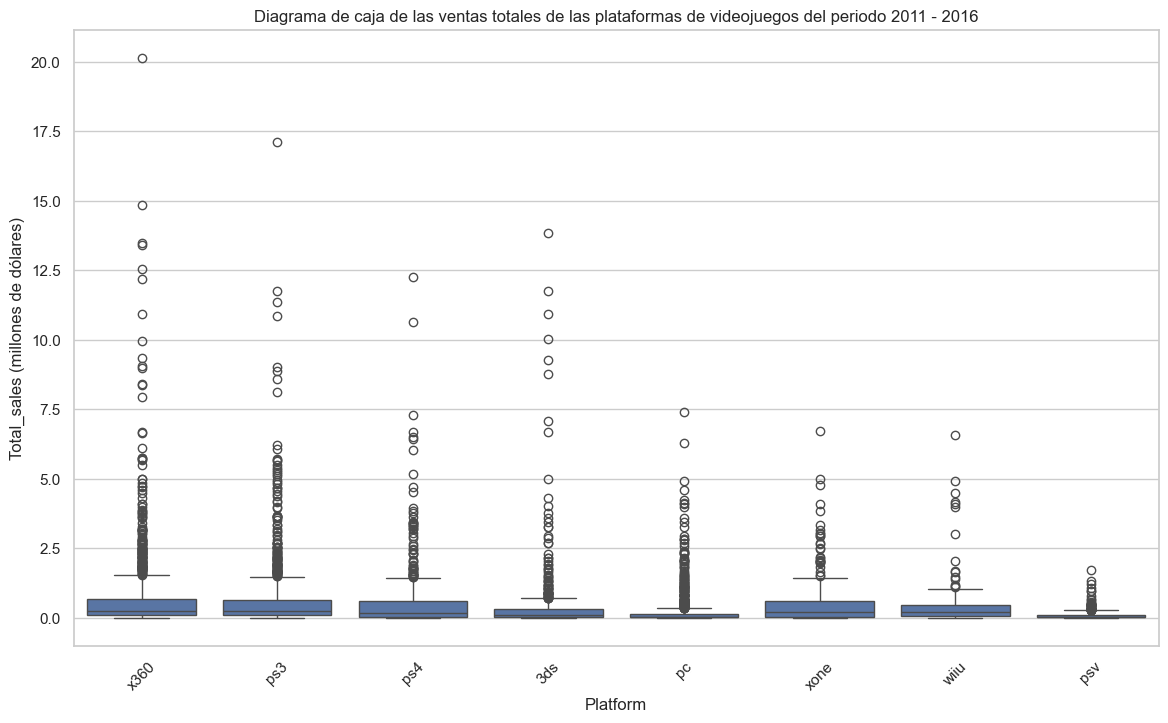

In [27]:
# Creación de un diagrama de caja con el df nuevo para el análisis de las ventas totales
sns.set(style='whitegrid')
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=df_games_updated)

# Creación de etiquetas del gráfico
plt.title('Diagrama de caja de las ventas totales de las plataformas de videojuegos del periodo 2011 - 2016')
plt.xlabel('Platform')
plt.ylabel('Total_sales (millones de dólares)')
plt.xticks(rotation=45)
plt.show()

En este diagrama de caja podemos encontrar información útil y relevante, primero observamos una media variada en todas las plataformas. También vemos que algunas tienen rangos muy definidos de ventas, sin contener muchos valores outliers, lo que nos deja ver que sus ventas son casi iguales con muy pocos juegos populares en esas plataformas, tales como `psv`, `wiiu`, `pc`. De `ps4` y `xone` vemos que como son plataformas nuevas están dando un rendimiento alto, ya que tienen algunos juegos con ventas un tanto altas. Donde sin duda vemos que las plataformas `x360` y `ps3` tienen juegos que son muy bien vendidos por su plataforma, vemos que los bigotes se encuentran en valores altos, lo cual nos dice que estas plataformas tienen juegos muy utilizados por muchos usuarios de videojuegos.

### Correlación de `total_sales` y `user_score` en la plataforma `x360`<a id=correlation_x360></a>

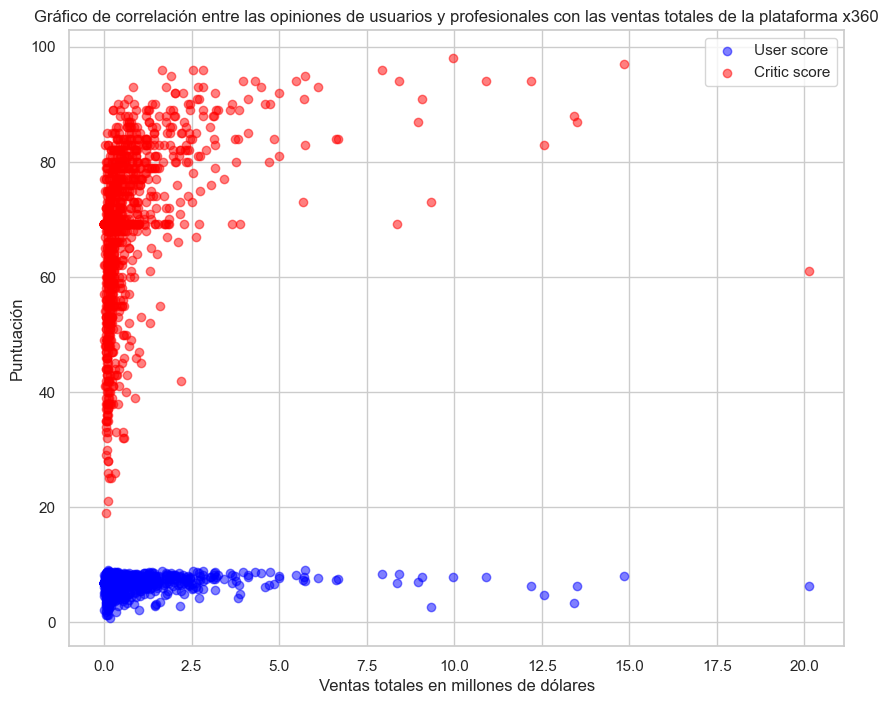

In [28]:
# Filtrado del df para seleccionar solo la plataforma `x360`

df_platform_x360 = df_games_updated[df_games_updated['platform'] == 'x360']

# Creación de la figura del diagrama
plt.figure(figsize=(10, 8))

# Creación del diagrama de correlación de `user_score` y `total_sales`
plt.scatter(df_platform_x360['total_sales'], df_platform_x360['user_score'], color='blue', alpha=0.5, label='User score')

# Creación del diagrama de correlación de `critic_score` y `total_sales`
plt.scatter(df_platform_x360['total_sales'], df_platform_x360['critic_score'], color='red', alpha=0.5, label='Critic score')

# Agregar etiquetas con los titulos
plt.title('Gráfico de correlación entre las opiniones de usuarios y profesionales con las ventas totales de la plataforma x360')
plt.ylabel('Puntuación')
plt.xlabel('Ventas totales en millones de dólares')
plt.legend()
plt.show()

In [29]:
# Calcular la correlación entre user_score y total_sales
correlation_user_sales = df_platform_x360['user_score'].corr(df_platform_x360['total_sales'])
print(f"Correlación entre User Score y Total Sales: {correlation_user_sales}")

# Calcular la correlación entre critic_score y total_sales
correlation_critic_sales = df_platform_x360['critic_score'].corr(df_platform_x360['total_sales'])
print(f"Correlación entre Critic Score y Total Sales: {correlation_critic_sales}")


Correlación entre User Score y Total Sales: 0.09806299094645017
Correlación entre Critic Score y Total Sales: 0.3720697162445933


Podemos notar a grandes rasgos que no existe una correlación entre `user_score` con `total_sales` si notamos hay muchos juegos con un alto puntuaje pero con muy pocas ventas totales, esto nos dice que no existe una correlación de que a mayor calificación mayores ventas de videojuegos, además con la función .corr nos salió una correlación de 0.098, que es muy poca casi insignificante. En el caso de `critic_score` y `total_sales` vemos una pobre correlación de 0.372, es decir aquí hay algunos juegos con buenas calificaciones que tiene ventas altas, aunque no es en muchos casos por lo tanto no se puede asegurar que entre mayor calificación de los críticos las ventas subirán.

### Comparar las ventas de videojuegos x360 con otras plataformas <a id=x360_vs_others></a>

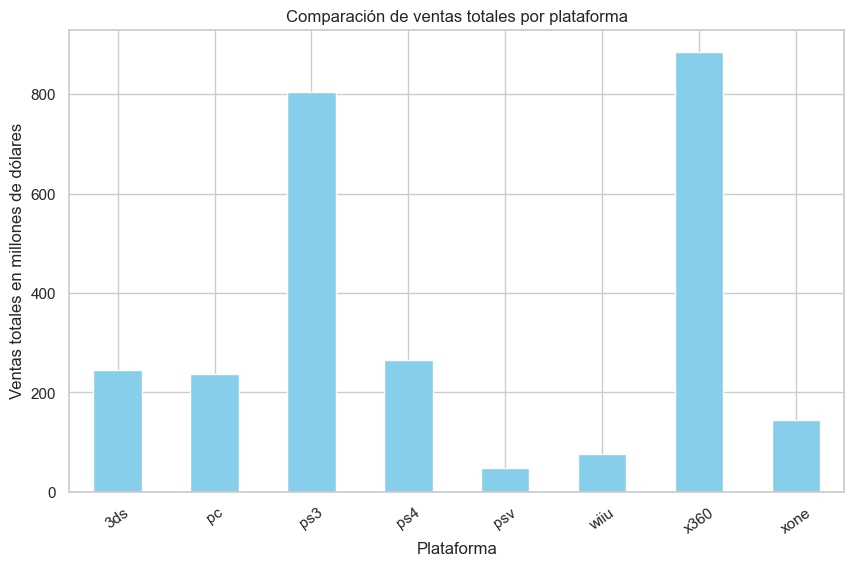

In [30]:
# Agrupar las ventas por plataforma para comparar con x360
total_sales_platform = df_games_updated.groupby('platform')['total_sales'].sum()

# Creación del gráfico
plt.figure(figsize=(10, 6))
total_sales_platform.plot(kind='bar', color='skyblue')

# Creación de etiquetas
plt.title('Comparación de ventas totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales en millones de dólares')
plt.xticks(rotation=35)
plt.show()


Podemos notar que `x360` es la plataforma con mas ventas, superando los 850 millones de dólares en ventas, un poco atrás `ps3` superando por poco los 800 millones de dólares, de ahí podemos notar que las demás plataformas tienen ventas bajas, nada comparadas a las ventas totales de `x360` o `ps3`.

### Distribución general de los géneros más famosos y menos rentables <a id=genres_famous></a>

In [31]:
rating_ranges = df_games_updated.groupby('genre').size()
rating_ranges

genre
action      4329
strategy     974
dtype: int64

En nuestro df seleccionado por periodo, solo están dos géneros, claramente vemos que el action es el que mas predomina por mucho, este es el mas rentable. En contraste el otro que es strategy es mucho menos seguido por los jugadores.

### Creación de perfil de usuario para cada región para obtener las 5 plataformas mas exitosas y los 5 géneros mas demandados <a id=user_perfil></a>

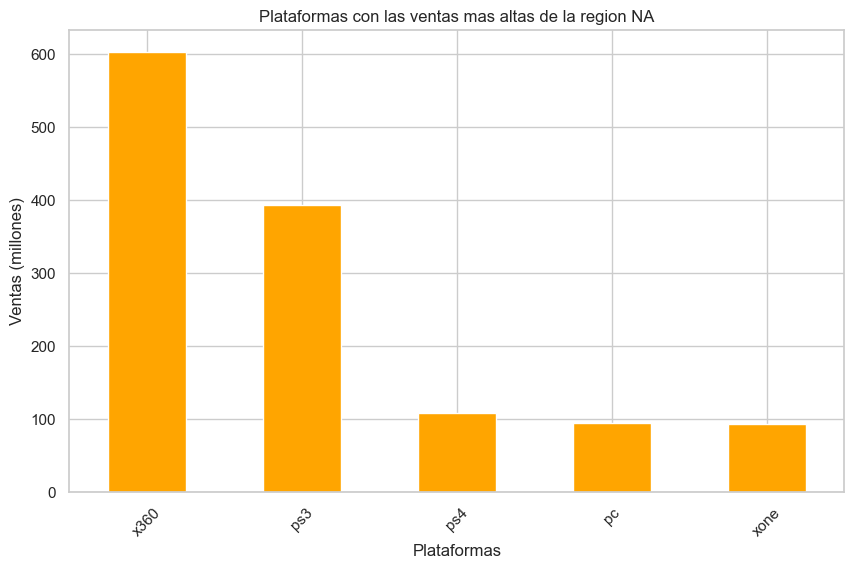

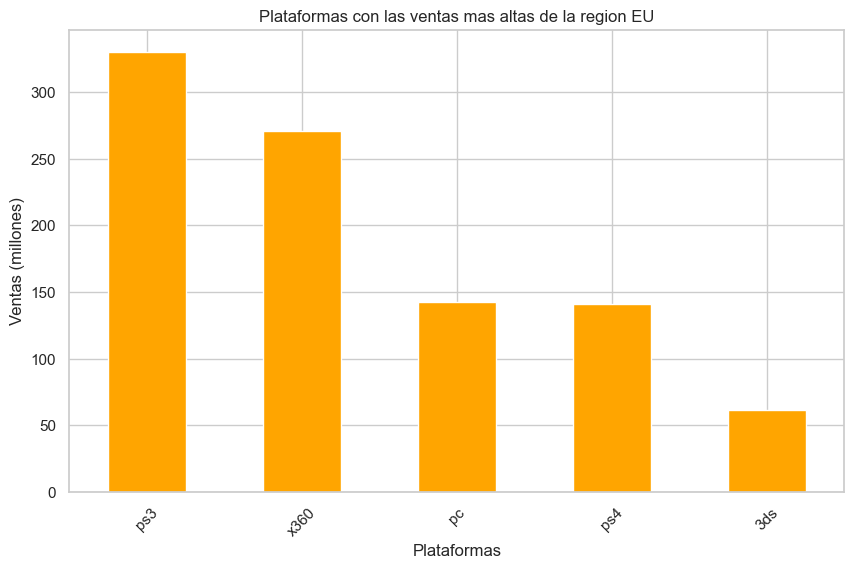

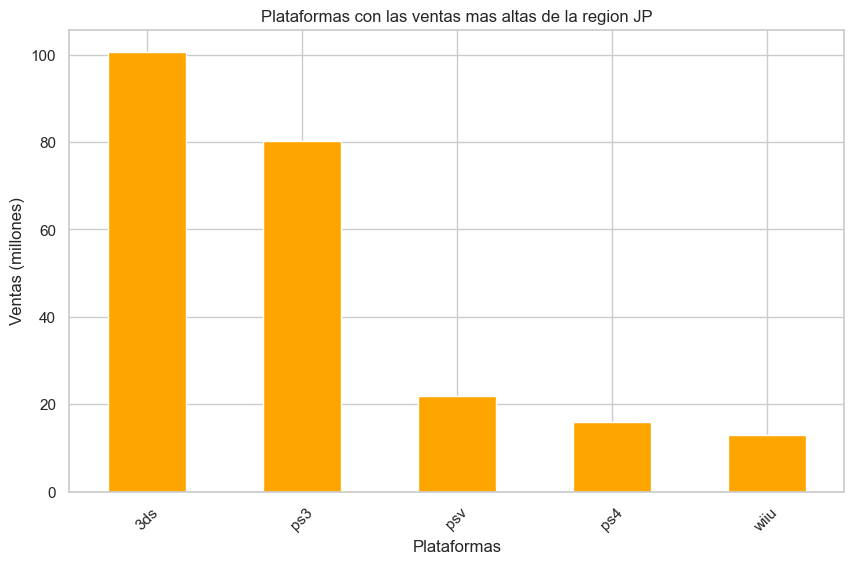

In [32]:
# Las plataformas mas famosas y rentables por región

na_platforms = df_games_updated.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_platforms = df_games_updated.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_platforms = df_games_updated.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

list_platforms = [na_platforms, eu_platforms, jp_platforms]
region_names = ['NA', 'EU', 'JP']

for data, region in zip(list_platforms, region_names):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', color='orange')
    plt.title(f'Plataformas con las ventas mas altas de la region {region}')
    plt.xlabel('Plataformas')
    plt.ylabel('Ventas (millones)')
    plt.xticks(rotation=45)
    plt.show()


Observamos que cada región tiene su plataforma popular para `NA` es `x360`, para `EU` es `ps3` y para `JP` es `3ds`. Donde también es digno de resaltar, que en NorteAmerica las ventas de la plataforma mas popular es de 600 millones de dólares, en Europa de mas de 300 millones de dólares y ej Japón la cifra baja mucho, la plataforma más popular solo recaudó un poco mas de 100 millones de dólares. Lo cual nos deja ver que el mercado americano es un devorador de consumo de videojuegos.

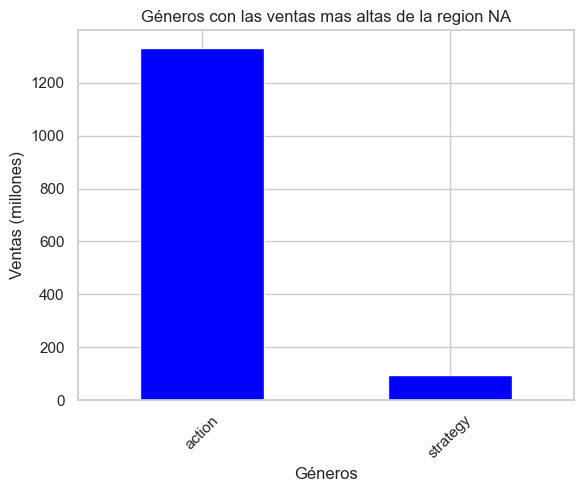

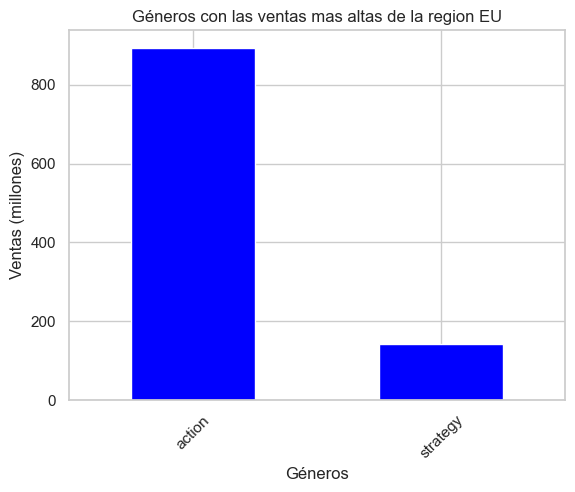

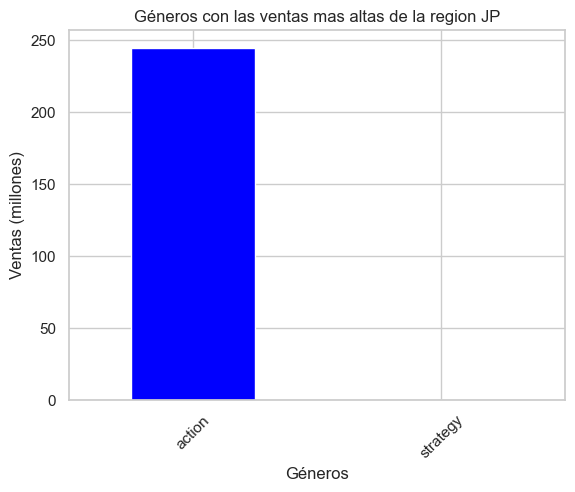

In [33]:
# Los géneros mas famosos y rentables por región
na_genre = df_games_updated.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
eu_genre = df_games_updated.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
jp_genre = df_games_updated.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

list_platforms_genre = [na_genre, eu_genre, jp_genre]
genre_region = ['NA', 'EU', 'JP']

# Creación del gráfico
for data, region in zip(list_platforms_genre, genre_region):
    data.plot(kind='bar', color='blue')
    plt.title(f'Géneros con las ventas mas altas de la region {region}')
    plt.xlabel('Géneros')
    plt.ylabel('Ventas (millones)')
    plt.xticks(rotation=45)
    plt.show()

Notamos que solo tenemos dos géneros famosos, para la region `NA` el género `action` es el más demandado con mas de 1200 millones de dólares en ventas totales, en la región `EU` el género más demandado es `action` nuevamente con ventas mayores a los 800 millones de dólares, en la región `JP` el género más demandando es `action` nuevamente con casi 250 millones de dólares en ventas, como vemos el género action es muy bien recibido por los usuarios, aunque el mercado americano es un devorador de videojuegos y de ganancias.

### Conclusiones de la etapa Análisis de Datos <a id=data_analyst_conclusions></a>
**Distribución de Ventas**: Las plataformas más rentables varían por región, destacando la Xbox 360 en América del Norte, la PlayStation en Europa, y Nintendo en Japón.

**Correlación de Puntuaciones**: Se encontró una correlación moderada entre las puntuaciones de los críticos y las ventas, mientras que la correlación con las puntuaciones de los usuarios fue más baja, lo que sugiere que las críticas profesionales tienen mayor influencia en las ventas.


# Etapa 4: Prueba de Hipótesis 

In [34]:
# Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

# Filtrar los datos para Xbox One y Pc
score_xbox = df_games_updated[df_games_updated['platform'] == 'xone']['user_score']
score_pc = df_games_updated[df_games_updated['platform'] == 'pc']['user_score']

# Realizar la prueba T
t_stat, p_value = ttest_ind(score_xbox, score_pc)

# Resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Decisión basada en el valor p
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula (Hay una diferencia significativa entre las calificaciones promedio).')
else:
    print('No podemos rechazar la hipótesis nula (No hay evidencia suficiente para decir que las calificaciones de los usuarios son diferentes)')


T-statistic: -4.742631402472834
P-value: 2.3584068499213693e-06
Rechazamos la hipótesis nula (Hay una diferencia significativa entre las calificaciones promedio).


Podemos concluir en base a la prueba t student que rechazamos la hipótesis nula debido a que el valor es sumamente bajo, con una notación científica de 6 ceros, en base a esto, concluimos que hay evidencia comprobable que las calificaciones son diferentes.

# Conclusiones finales del proyecto <a id=final_conclusions></a>

1. **Distribución de Ventas por Región**: 
   - Las plataformas más rentables varían significativamente por región. 
   - En América del Norte, Xbox 360 lidera las ventas, mientras que en Europa, PlayStation es la plataforma dominante. 
   - En Japón, las plataformas de Nintendo muestran un claro dominio en el mercado.

2. **Preferencias de Géneros por Región**:
   - Los géneros más populares también varían por región, reflejando diferentes preferencias culturales.
   - En América del Norte y Europa, los juegos de acción y deportes son los más vendidos, mientras que en Japón, los juegos de rol y simulación tienen mayor aceptación.

3. **Influencia de las Críticas en las Ventas**:
   - Se encontró una correlación moderada entre las puntuaciones de los críticos y las ventas de los videojuegos, sugiriendo que las críticas profesionales influyen en la decisión de compra de los consumidores.
   - La correlación entre las puntuaciones de los usuarios y las ventas fue más baja, lo que indica que la opinión de los usuarios tiene un impacto menor en las ventas.

4. **Prueba de Hipótesis**:
   - Las pruebas de hipótesis realizadas mostraron diferencias significativas en las calificaciones promedio de los usuarios entre las plataformas Xbox One y PC, así como entre los géneros de acción y deportes.
   - Estos resultados subrayan la importancia de entender las preferencias específicas de los usuarios por plataforma y género para maximizar las ventas.

5. **Recomendaciones**:
   - Para los desarrolladores y distribuidores de videojuegos, es crucial adaptar sus estrategias de marketing y distribución según las características de cada región y las preferencias del público objetivo.
   - La inversión en calidad y la obtención de buenas críticas profesionales pueden ser factores clave para el éxito de un videojuego en el mercado.

